# Energy production nordic countries 

In [197]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('all_energy_statistics.csv')

df

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates
...,...,...,...,...,...,...,...
1189477,Viet Nam,Electricity - total wind production,2012,"Kilowatt-hours, million",92.0,1.0,wind_electricity
1189478,Viet Nam,Electricity - total wind production,2011,"Kilowatt-hours, million",87.0,NaN,wind_electricity
1189479,Viet Nam,Electricity - total wind production,2010,"Kilowatt-hours, million",50.0,NaN,wind_electricity
1189480,Viet Nam,Electricity - total wind production,2009,"Kilowatt-hours, million",10.0,NaN,wind_electricity


## Cleaning dataset 

In [48]:
# noticed that column quantity_footnotes had alot of NaN values, decided to inspect 
temp = df['quantity_footnotes'].unique()
sorted(temp)

[nan, 1.0]

In [77]:
# Can drop the column since it does not say anything useful imo
df.drop("quantity_footnotes", axis=1, inplace=True)

In [78]:
df

,country_or_area,commodity_transaction,year,unit,quantity,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,additives_and_oxygenates
...,...,...,...,...,...,...
1189477,Viet Nam,Electricity - total wind production,2012,"Kilowatt-hours, million",92.0,wind_electricity
1189478,Viet Nam,Electricity - total wind production,2011,"Kilowatt-hours, million",87.0,wind_electricity
1189479,Viet Nam,Electricity - total wind production,2010,"Kilowatt-hours, million",50.0,wind_electricity
1189480,Viet Nam,Electricity - total wind production,2009,"Kilowatt-hours, million",10.0,wind_electricity


## Selecting countries to look at 

In [104]:
#Some nordic countries
SE = df[df.country_or_area.isin(["Sweden"])].sort_values('year')
DK = df[df.country_or_area.isin(["Denmark"])].sort_values('year')
FI = df[df.country_or_area.isin(["Finland"])].sort_values('year')
NO = df[df.country_or_area.isin(["Norway"])].sort_values('year')

In [67]:
# looking for what data to use 
# t = SE['commodity_transaction'].unique()
# sorted(t)
# Decided on the below...
# Electricity - total hydro production
# Electricity - total wind production
# Electricity - total nuclear production

## Making smaller dataFrames

In [193]:

SE_wind = SE[SE.commodity_transaction == "Electricity - total wind production"].sort_values("year")
SE_hydro = SE[SE.commodity_transaction == "Electricity - total hydro production"].sort_values("year")
SE_nuclear = SE[SE.commodity_transaction == "Electricity - total nuclear production"].sort_values("year")

DK_wind = DK[DK.commodity_transaction == "Electricity - total wind production"].sort_values("year")
FI_wind = FI[FI.commodity_transaction == "Electricity - total wind production"].sort_values("year")
NO_wind = NO[NO.commodity_transaction == "Electricity - total wind production"].sort_values("year")

## Total hydro, wind and nuclear production in Sweden

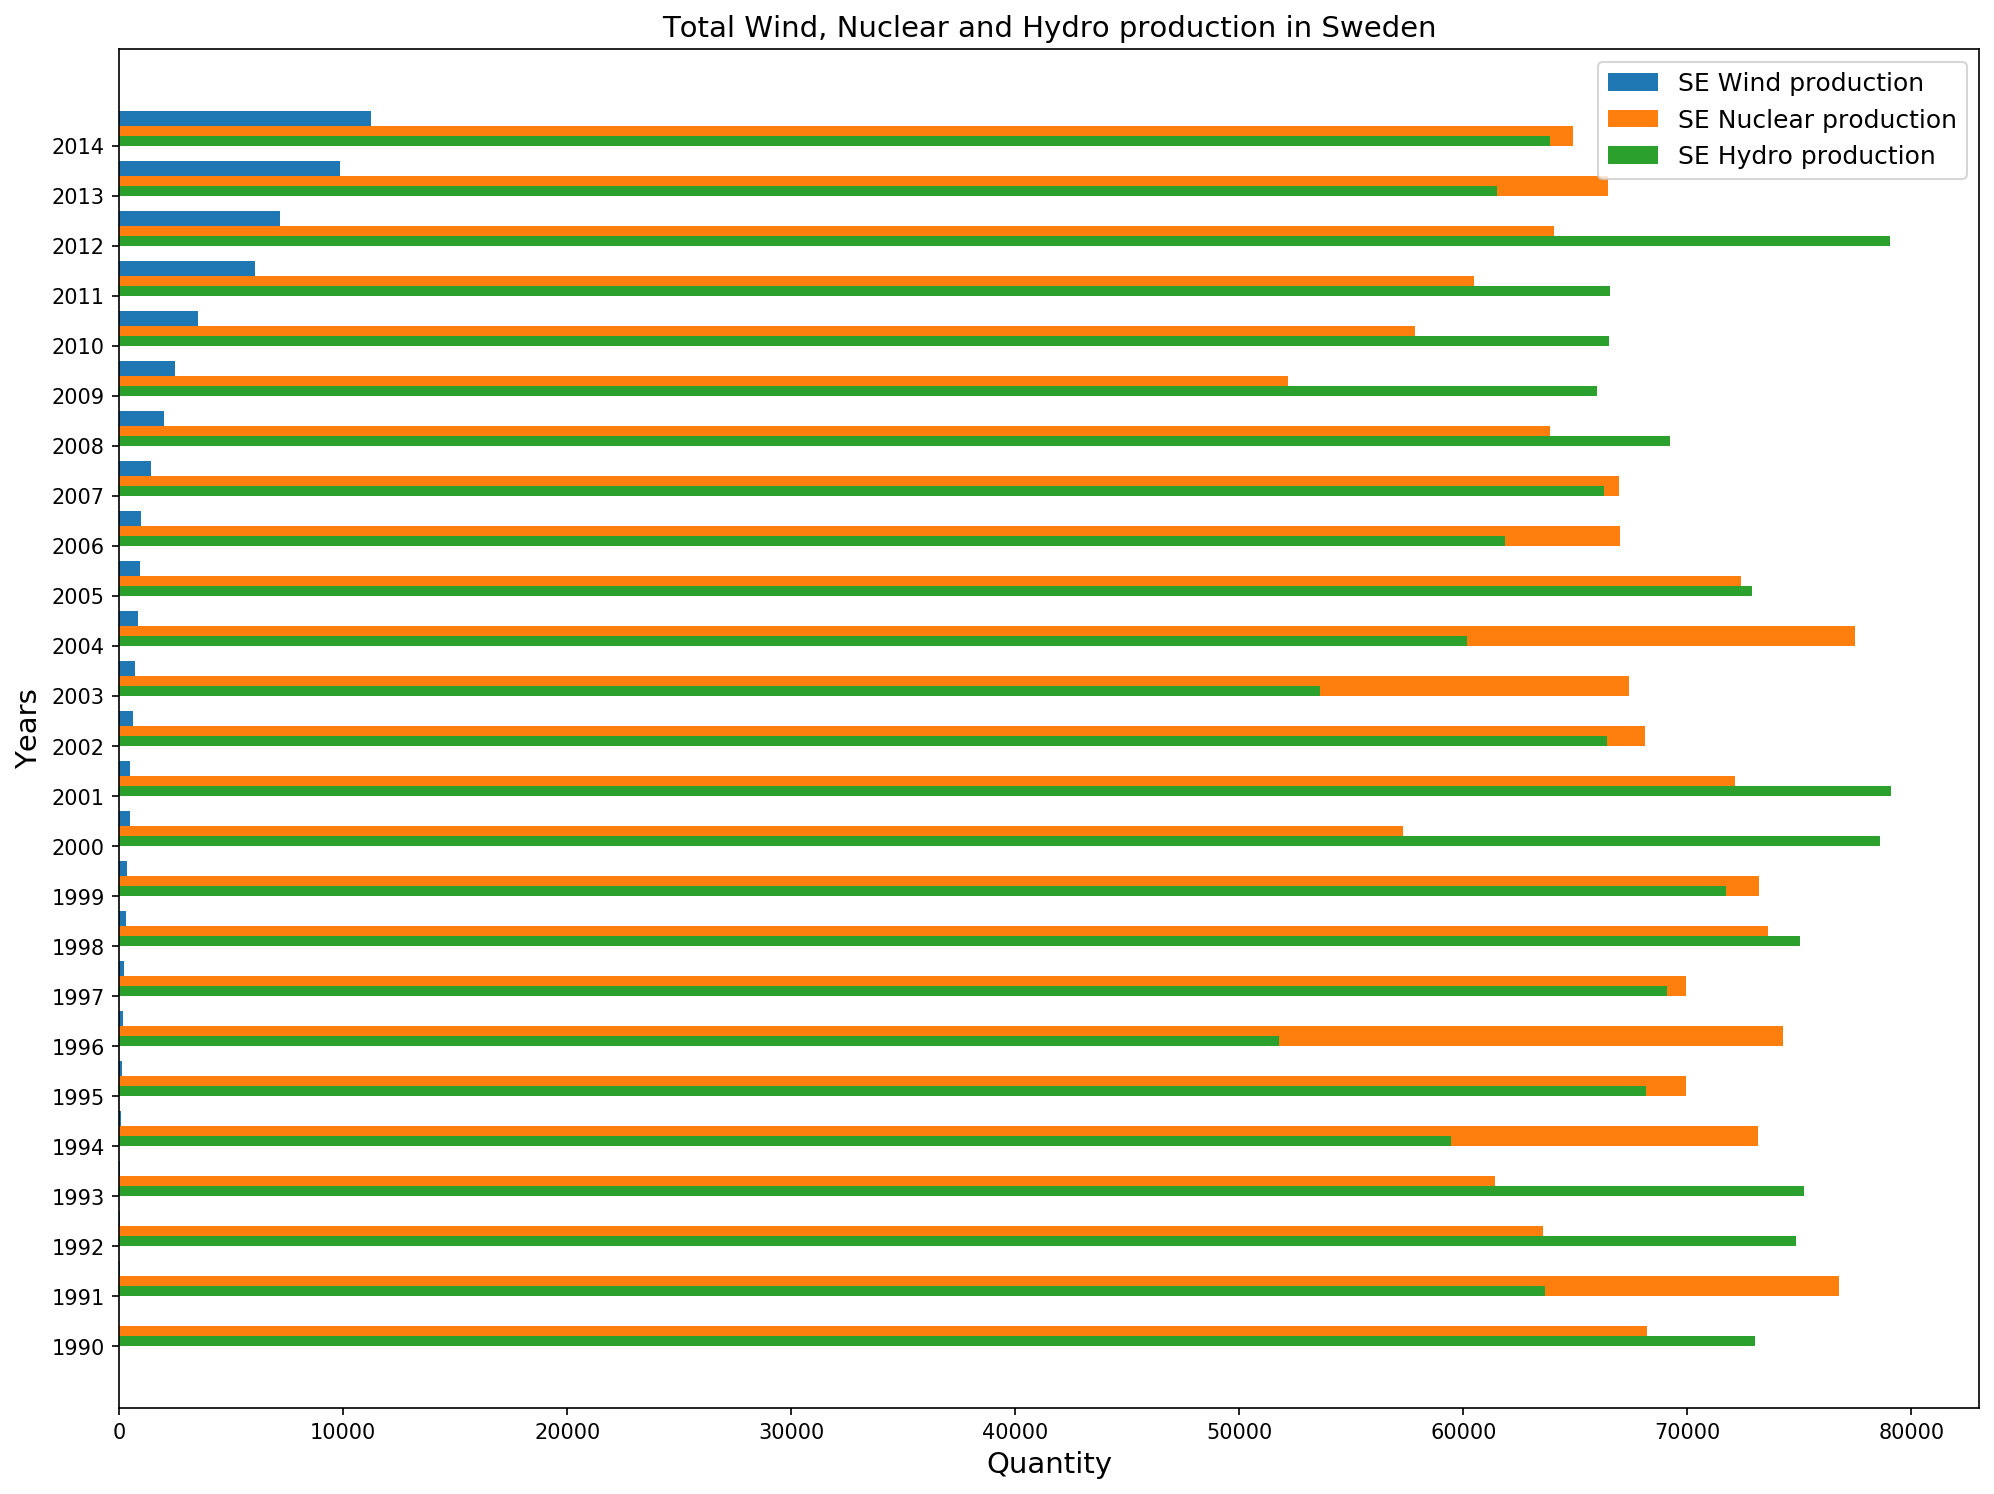

In [196]:
years = range(1990, 2015)
br= .7
plt.figure(figsize=(16,12), dpi=150)
plt.barh(SE_wind["year"] , SE_wind["quantity"],align ='edge', height=br, label="SE Wind production")
plt.barh(SE_nuclear["year"] , SE_nuclear["quantity"],align ='edge', height=br-.3, label="SE Nuclear production")
plt.barh(SE_hydro["year"] , SE_hydro["quantity"],align ='edge', height=br-.5, label="SE Hydro production")
plt.yticks(years)

plt.legend(fontsize=12)
plt.ylabel("Years", fontsize=14)
plt.xlabel("Quantity", fontsize=14)
plt.title("Total Wind, Nuclear and Hydro production in Sweden", fontsize=14)
plt.xlim()
plt.show()

## Comparing wind production in SE, DK, NO, FI

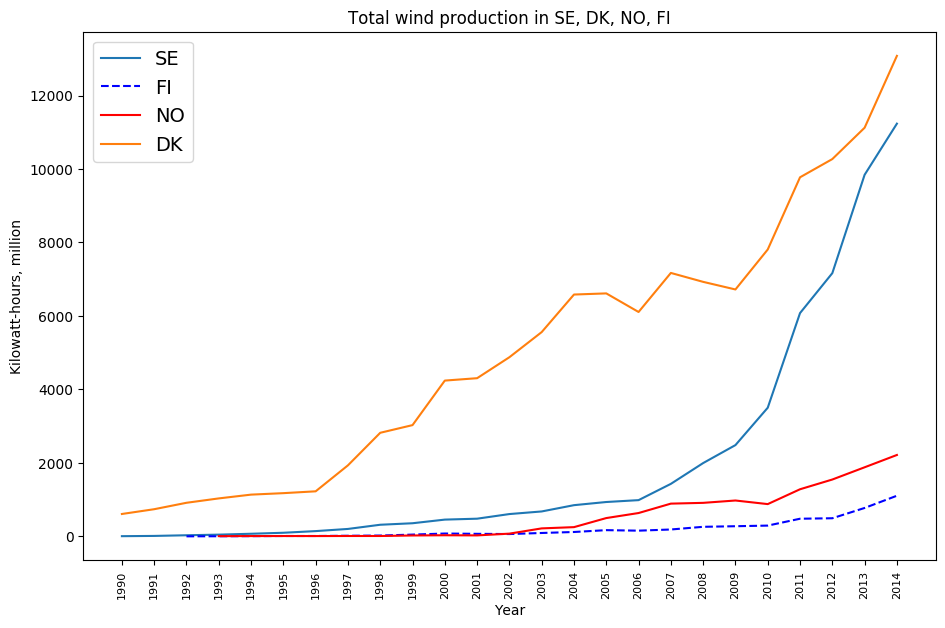

In [146]:
plt.figure(figsize=(11,7), dpi=100)
plt.plot(SE_wind.year, SE_wind.quantity, label='SE')
plt.plot(FI_wind.year, FI_wind.quantity, 'b--', label='FI')
plt.plot(NO_wind.year, NO_wind.quantity, 'r', label='NO')
plt.plot(DK_wind.year, DK_wind.quantity, label='DK')

plt.xticks(years,rotation='vertical', size=8)
plt.legend(fontsize=14)
plt.ylabel('Kilowatt-hours, million')
plt.xlabel('Year')
plt.title('Total wind production in SE, DK, NO, FI')
plt.show()